#Import Statements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cbook as cbook
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Import Data

In [ ]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Data Cleaning

#Dealing with duplicates

In [ ]:
#Remove duplicates
#check duplicates
print("before duplicate drop: ", df.shape)
duplicates = df[df.duplicated(keep=False)]
df=df.drop_duplicates()
print("After duplicate drop: ", df.shape)
print("difference=", 119390-87396 )

before duplicate drop:  (119390, 32)
After duplicate drop:  (87396, 32)
difference= 31994


#Dealing with null values

In [ ]:
#check null values
print("before null drop: ", df.shape)
df.isnull().sum()

before null drop:  (87396, 32)


hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [ ]:
#company has too many null values so drop this
df=df.drop('company', axis=1)
df.shape

(87396, 31)

In [ ]:
#while viewing the dataset in excel the best way could be to fill with nearest values
df['country']=df['country'].fillna(method='bfill')
#for agents same
df['agent']=df['agent'].fillna(method='bfill')
#null values in children are only 4 so we can drop rows
df = df.dropna(axis=0)

In [ ]:
df.isna().sum().sum()

0

#Looking for Outliers

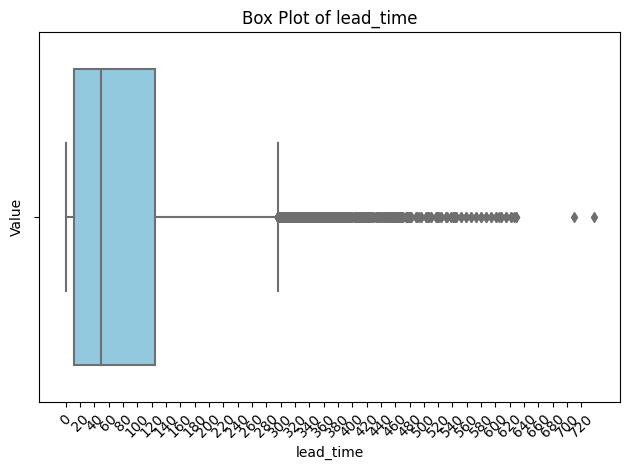

In [ ]:
#with observations from .info() and .describe() method there are no bad outliers except isnt 737 too much!
#lets make a box plot on this
sns.boxplot(x='lead_time', data=df, color='skyblue')

# Set x and y axis labels
xticks = list(range(0, max(df['lead_time']) + 1, 20 ))
plt.xticks(xticks)
plt.xticks(rotation=45)
plt.xlabel('lead_time')
plt.ylabel('Value')

# Add a title
plt.title('Box Plot of lead_time')
plt.tight_layout()
# Show the plot
plt.show()

In [ ]:
df[df['lead_time']>=600]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,304.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
4182,Resort Hotel,0,709,2016,February,9,25,8,20,2,...,2,No Deposit,240.0,0,Transient,68.0,0,0,Check-Out,2016-03-24
58879,City Hotel,1,605,2016,October,43,17,1,2,2,...,0,Non Refund,1.0,0,Transient,60.0,0,0,Canceled,2016-09-20
60173,City Hotel,1,626,2016,November,46,7,1,2,2,...,0,Non Refund,1.0,0,Transient,62.8,0,0,Canceled,2016-09-26
64092,City Hotel,1,601,2017,March,9,2,0,1,1,...,0,Non Refund,1.0,0,Transient,59.0,0,0,Canceled,2015-10-21
64096,City Hotel,1,601,2017,March,9,2,0,2,2,...,0,Non Refund,1.0,0,Transient,62.0,0,0,Canceled,2015-10-21
64397,City Hotel,1,608,2017,March,10,9,0,1,1,...,0,Non Refund,1.0,0,Transient,59.0,0,0,Canceled,2015-10-21
64400,City Hotel,1,608,2017,March,10,9,0,2,2,...,0,Non Refund,1.0,0,Transient,62.0,0,0,Canceled,2015-10-21
64762,City Hotel,1,615,2017,March,11,16,0,1,1,...,0,Non Refund,1.0,0,Transient,59.0,0,0,Canceled,2015-10-21
64766,City Hotel,1,615,2017,March,11,16,0,2,2,...,0,Non Refund,1.0,0,Transient,62.0,0,0,Canceled,2015-10-21


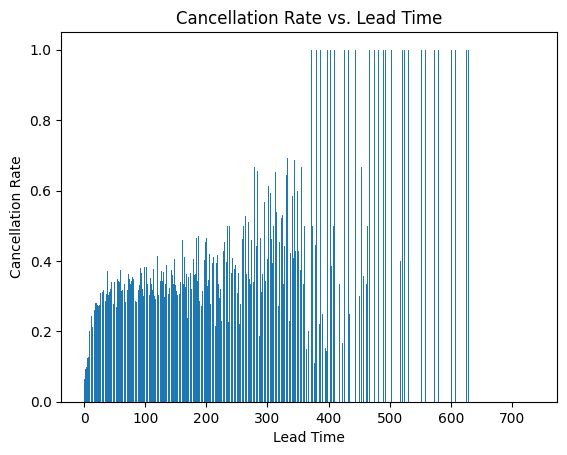

In [ ]:
# Grouping data by lead_time and calculating the cancellation rate
grouped = df.groupby('lead_time')['is_canceled'].mean()

# Creating a bar plot
plt.bar(grouped.index, grouped.values)
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate vs. Lead Time')
plt.show()
#shows more lead time lead to more certainity in cancellation

#Feature Selection using EDA


#Dropping reservation_status column.

In [ ]:
df[['is_canceled', 'reservation_status']]# both these cols are same by observing
print("the not canceled in ""is canceled"": ", df[df['is_canceled']==0].shape)
print("the not canceled  ""in reser_vationstatus"": ",df[df['reservation_status']=="Check-Out"].shape)
#df['reservation_status'=="Check-Out"].shape
df['reservation_status'].unique()
if (df[df["is_canceled"] == 0]).equals(df[df['reservation_status'] == "Check-Out"]):
    print("The selected rows are the same.")

#hence dropping reservation status column
print("dropping reservation_status")
df.drop('reservation_status', axis=1, inplace=True)
print("new df dimensions are", df.shape)

the not canceled in is canceled:  (63371, 31)
the not canceled  in reser_vationstatus:  (63371, 31)
The selected rows are the same.
dropping reservation_status
new df dimensions are (87392, 30)


# EDA of categorical values



['meal', 'country', 'market_segment', 'distribution_channel']


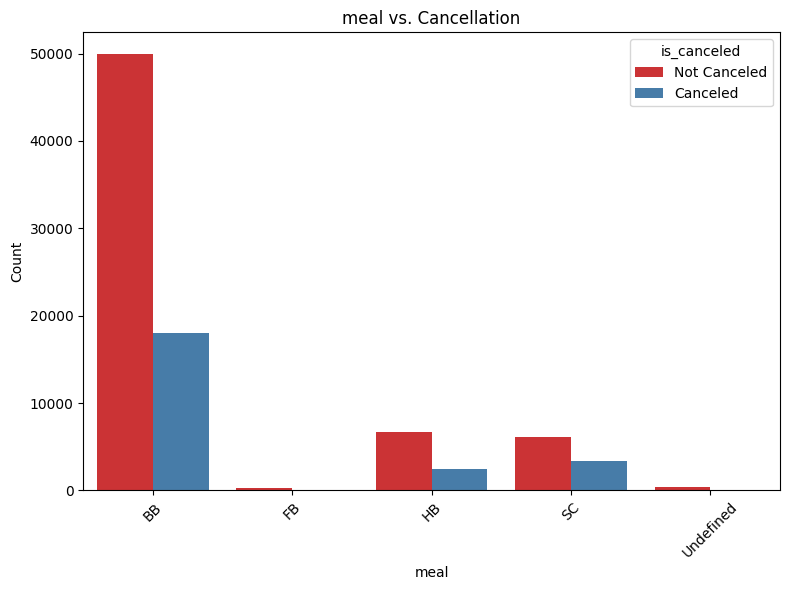

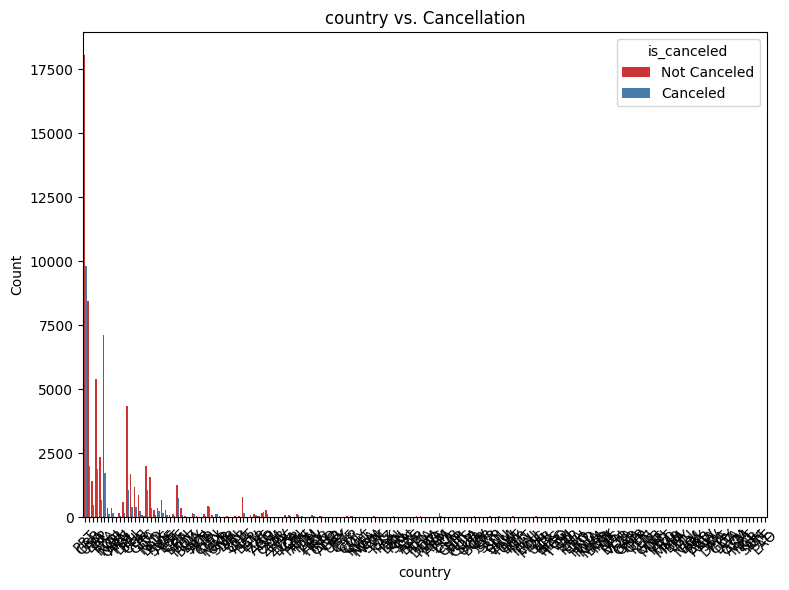

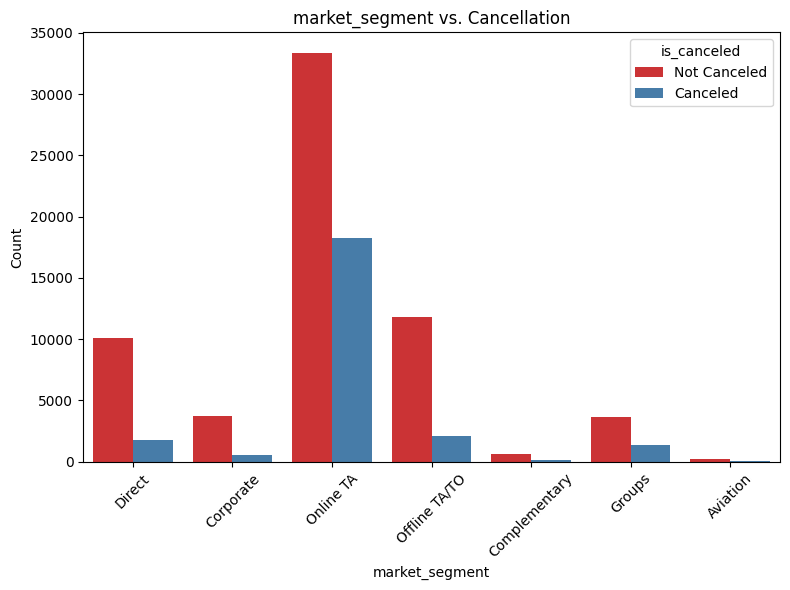

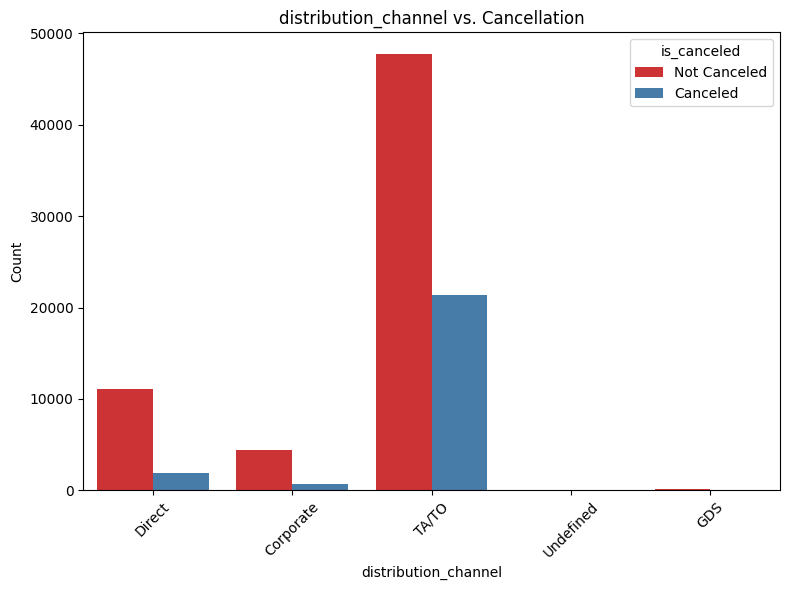

In [ ]:
cols=[	'meal',	'country',	'market_segment',	'distribution_channel']
print(cols)
for column in cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, hue="is_canceled", palette="Set1")
    plt.title(f"{column} vs. Cancellation")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(title="is_canceled", labels=["Not Canceled", "Canceled"])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#in all columns and distribution we can observe there is a linear type relation ship
#for example greater the number of bookings in a sector greater the chances of cancelation

Grouping meal, distribution channel and market segment together

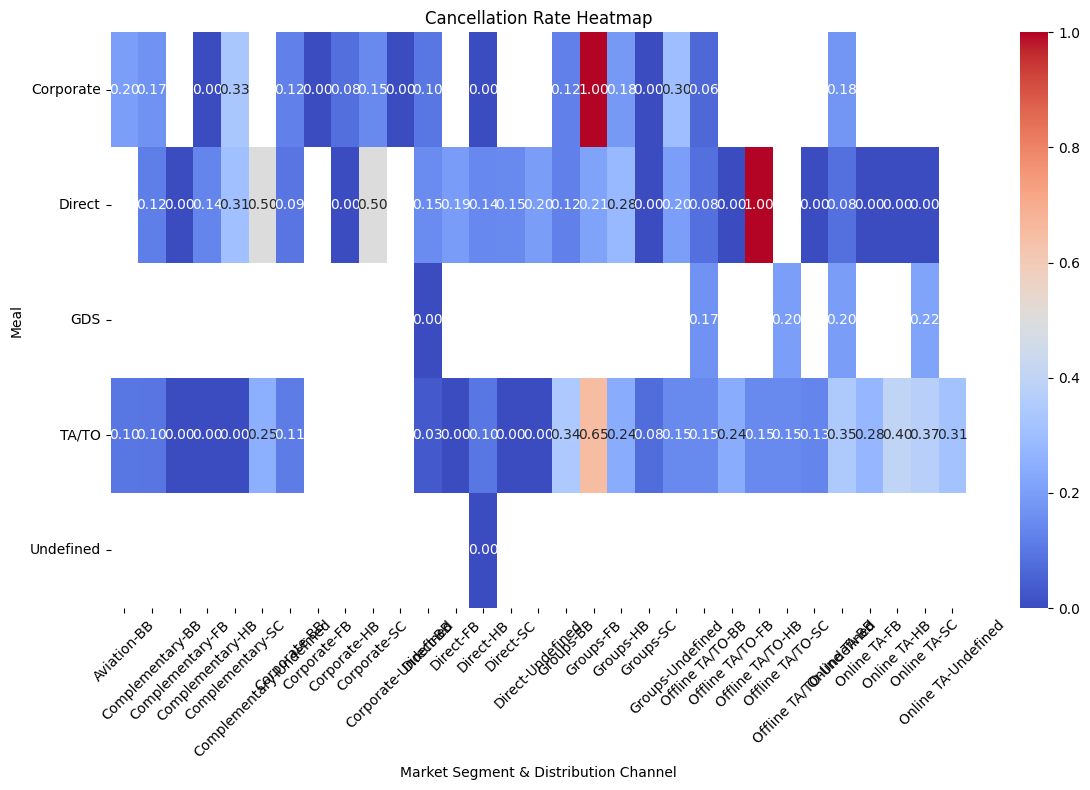

In [ ]:
# Pivot the data for heatmap
pivot_df = df.pivot_table(index='distribution_channel', columns=['market_segment', 'meal'], values='is_canceled', aggfunc=np.mean)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Cancellation Rate Heatmap")
plt.xlabel("Market Segment & Distribution Channel")
plt.ylabel("Meal")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

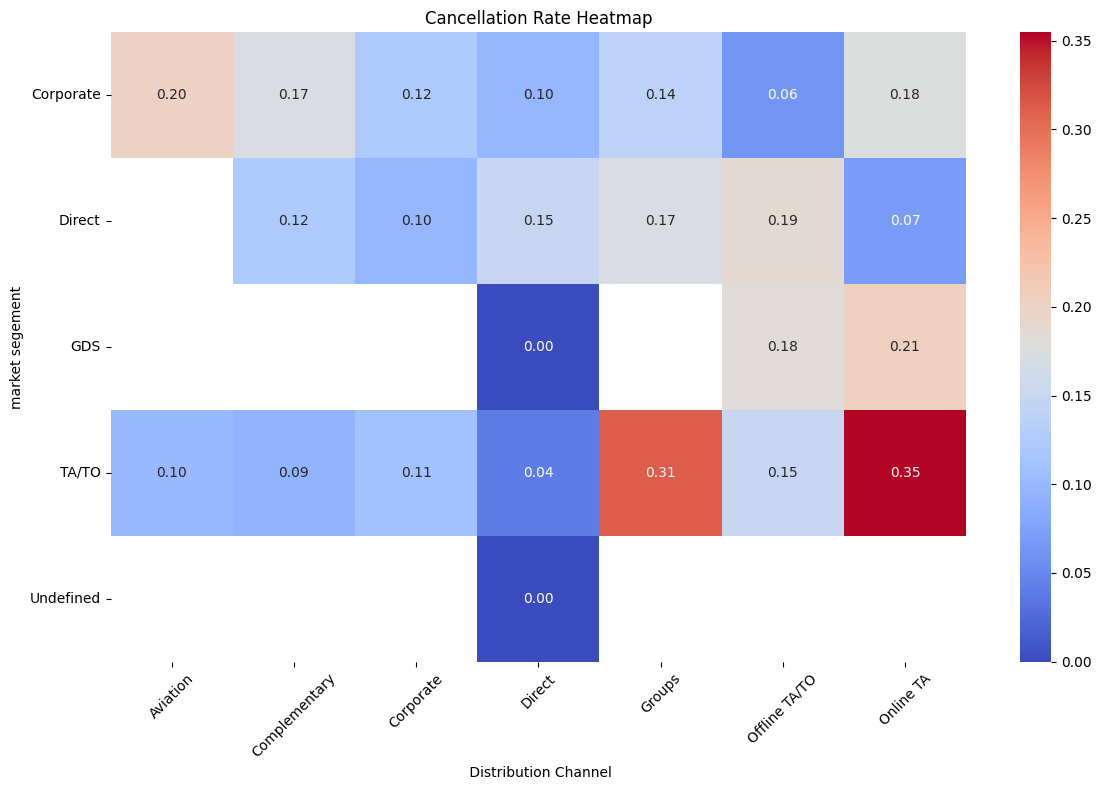

In [ ]:
#lets look without breakfast..
# Pivot the data for heatmap
pivot_df = df.pivot_table(index='distribution_channel', columns=['market_segment'], values='is_canceled', aggfunc=np.mean)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Cancellation Rate Heatmap")
plt.xlabel(" Distribution Channel")
plt.ylabel("market segement")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#people with direct distribution channel and gds market segment has 0 percent cancelation rate
dummy = df[df['market_segment'] == 'Online TA']

dummy=dummy[dummy['distribution_channel'] == 'TA/TO']


count_cancelation = dummy['is_canceled'].value_counts()

print(count_cancelation)


0    33115
1    18201
Name: is_canceled, dtype: int64


In [ ]:
#not much intuition just that cancelation rate are low in this combo

#EDA for room types, deposits and customer type

['reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']


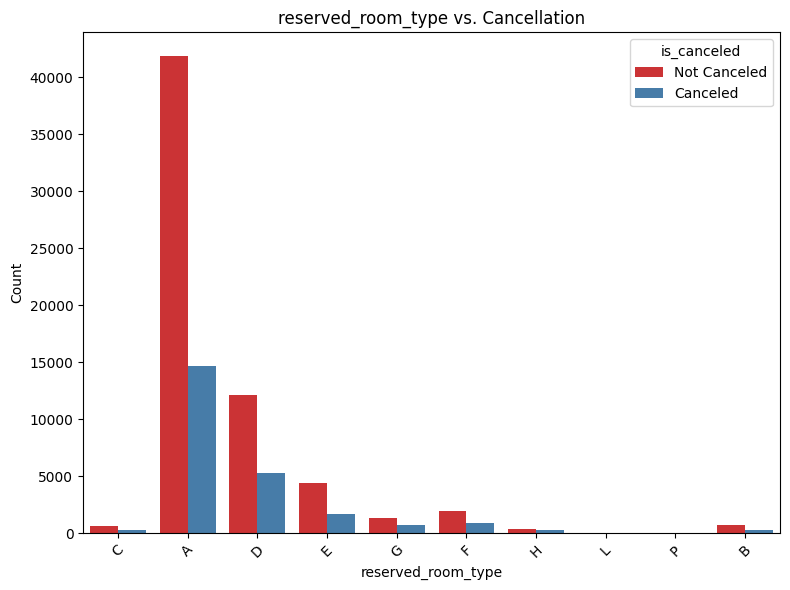

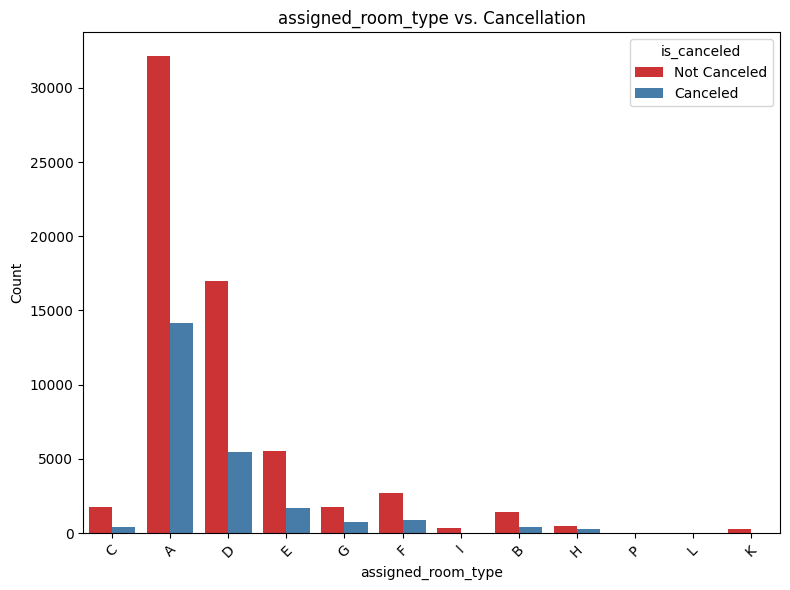

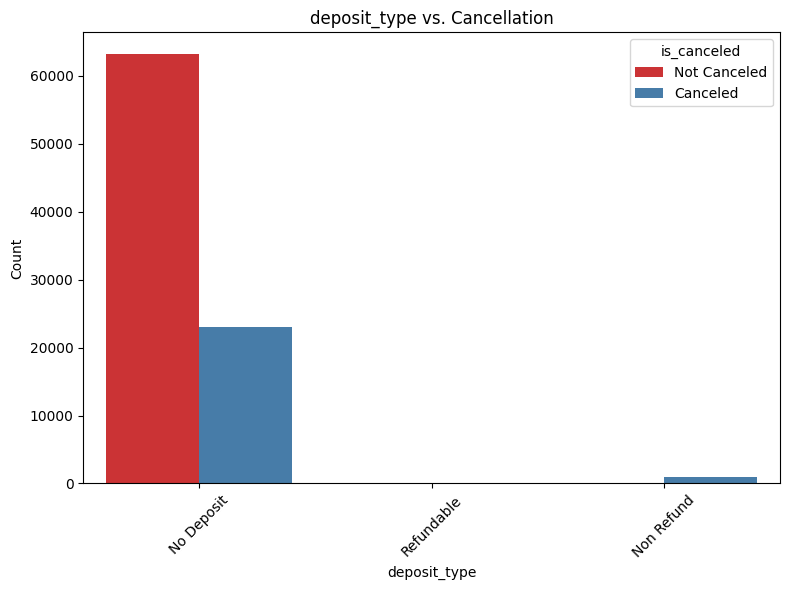

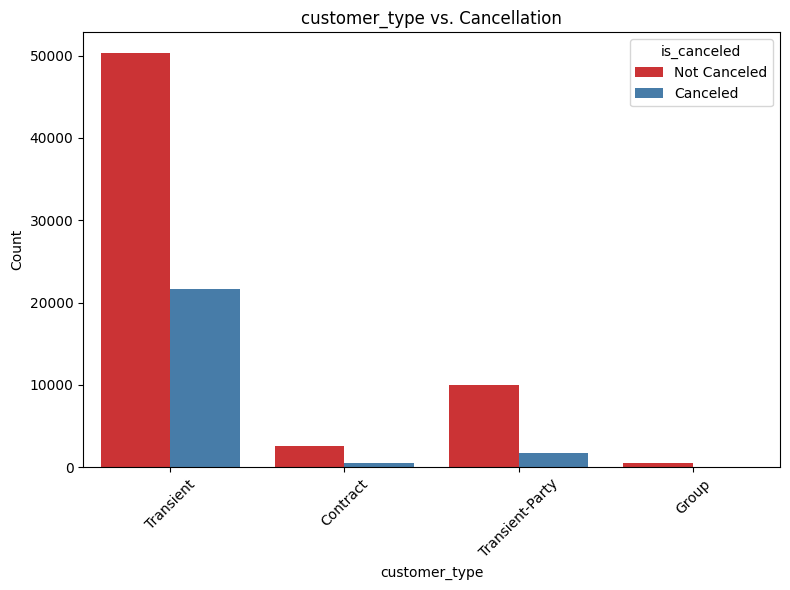

In [ ]:
cols=[	'reserved_room_type'	,'assigned_room_type',	'deposit_type', 'customer_type']
print(cols)
for column in cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, hue="is_canceled", palette="Set1")
    plt.title(f"{column} vs. Cancellation")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(title="is_canceled", labels=["Not Canceled", "Canceled"])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

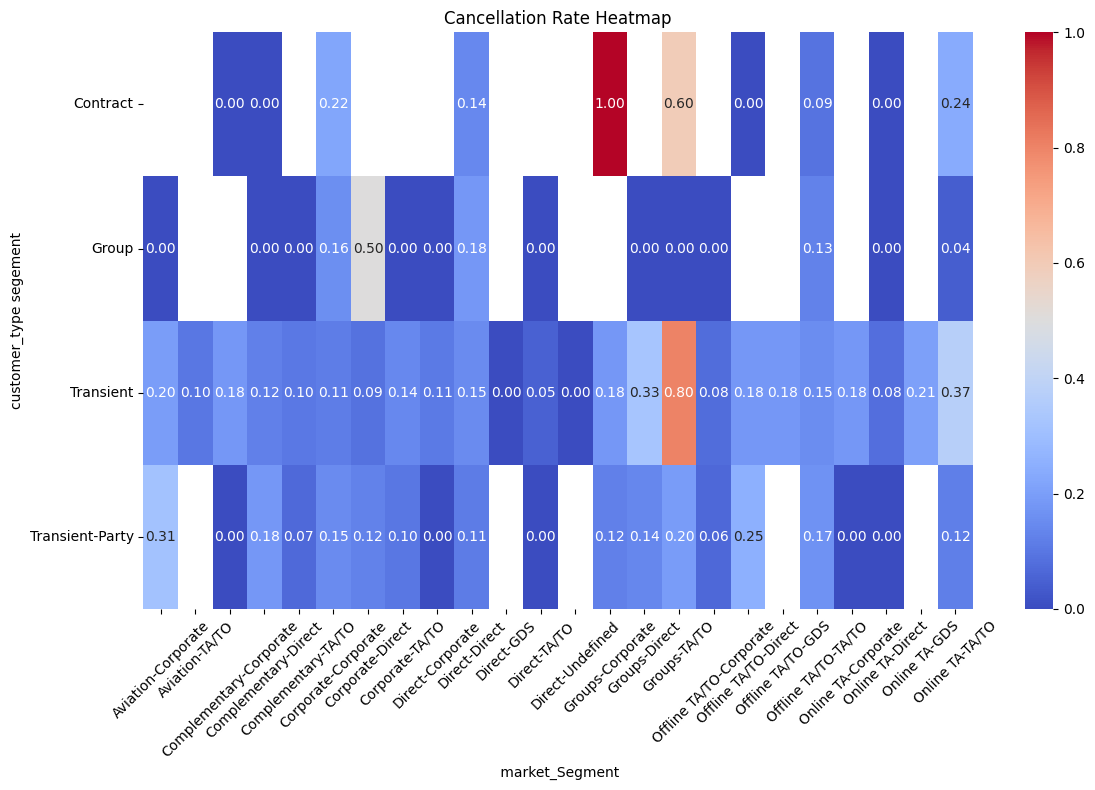

In [ ]:
#another heat map but including customer type
# Pivot the data for heatmap
pivot_df = df.pivot_table(index='customer_type', columns=['market_segment', 'distribution_channel'], values='is_canceled', aggfunc=np.mean)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Cancellation Rate Heatmap")
plt.xlabel(" market_Segment")
plt.ylabel("customer_type segement")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

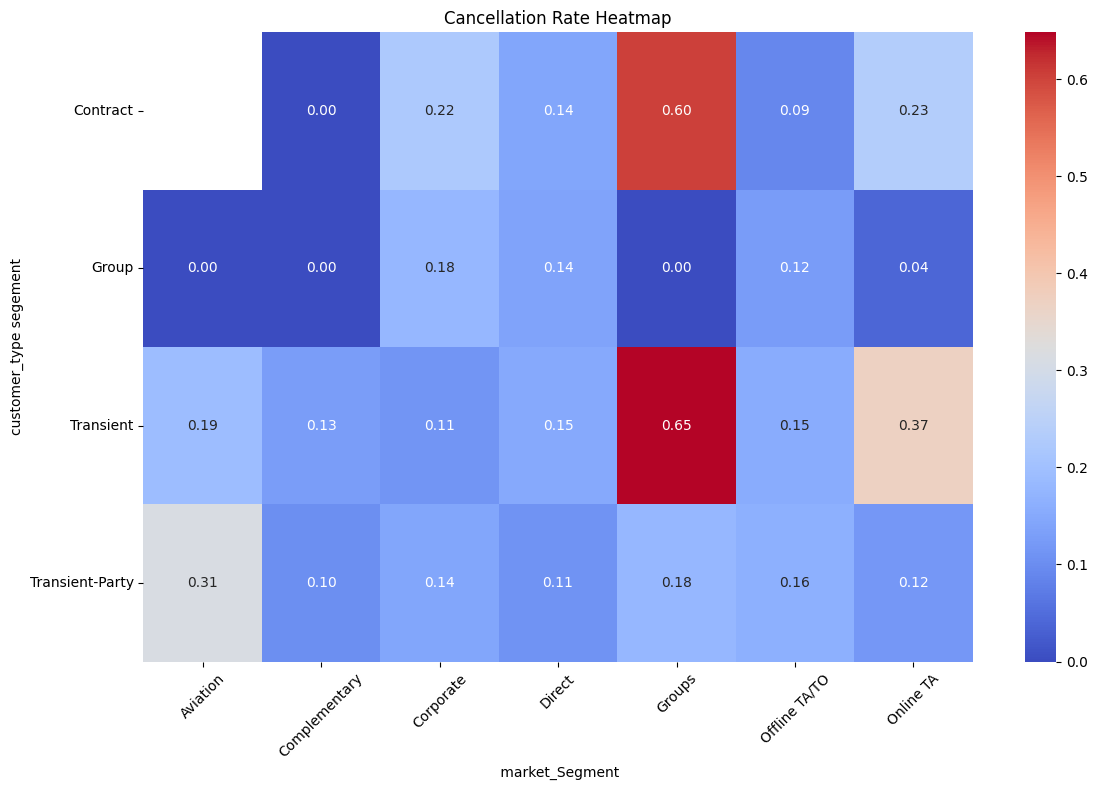

In [ ]:
pivot_df = df.pivot_table(index='customer_type', columns=['market_segment'], values='is_canceled', aggfunc=np.mean)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Cancellation Rate Heatmap")
plt.xlabel(" market_Segment")
plt.ylabel("customer_type segement")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

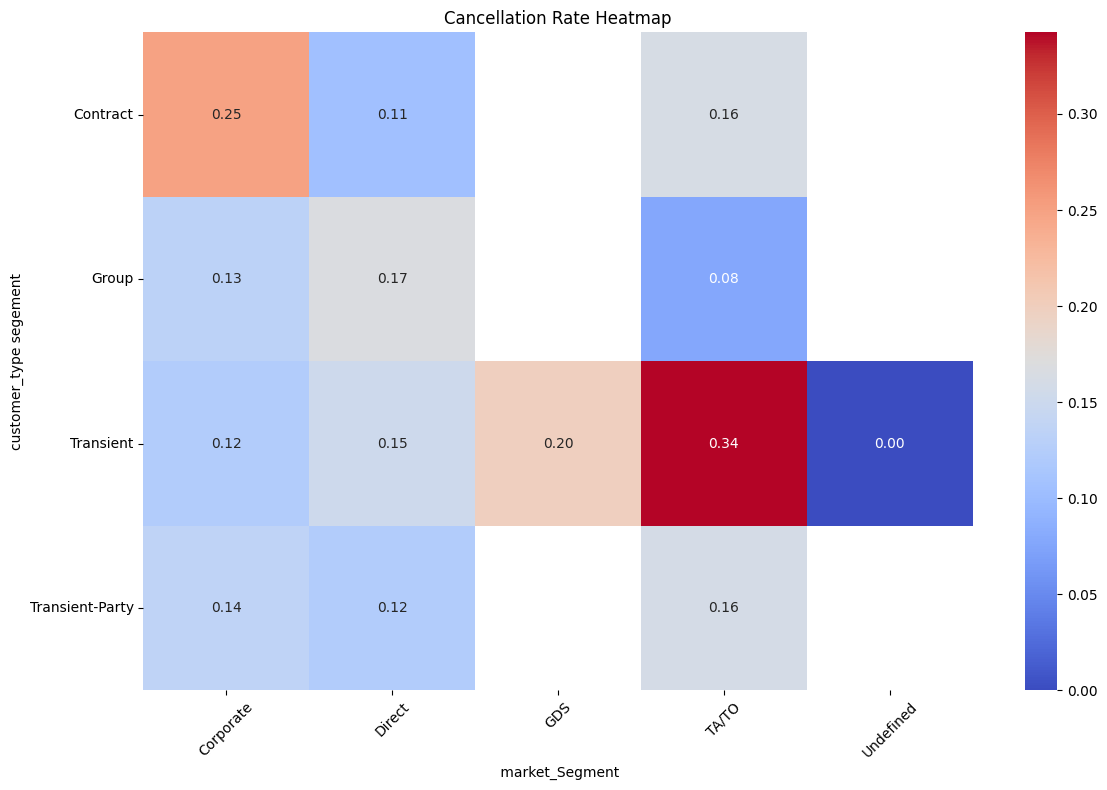

In [ ]:
pivot_df = df.pivot_table(index='customer_type', columns=['distribution_channel'], values='is_canceled', aggfunc=np.mean)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Cancellation Rate Heatmap")
plt.xlabel(" market_Segment")
plt.ylabel("customer_type segement")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#definitely some relation in these customer_type, market segment, distribution channels
#dropping meal column in future because these heat maps without meal give a constant relation between some parameters

In [ ]:
dummy=df[df['deposit_type']=='Refundable']
canceled_counts = dummy['is_canceled'].value_counts()

print(canceled_counts)

0    81
1    26
Name: is_canceled, dtype: int64


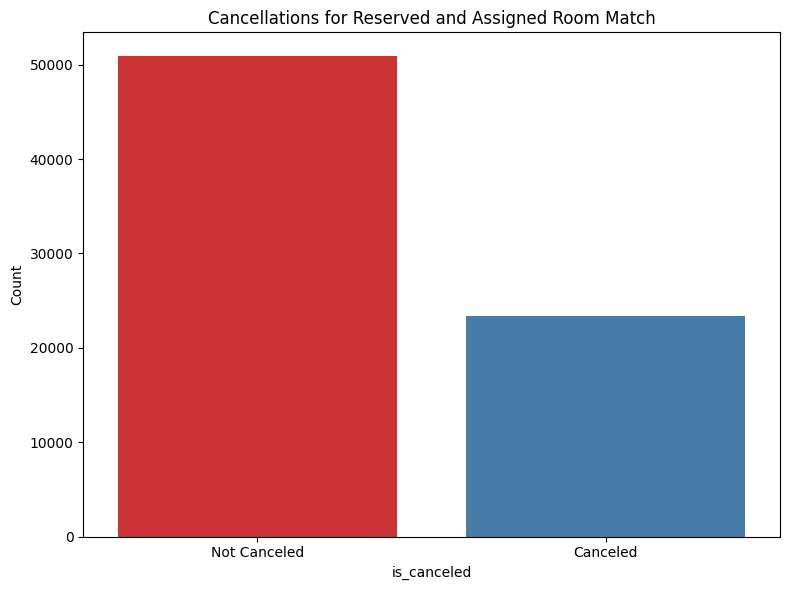

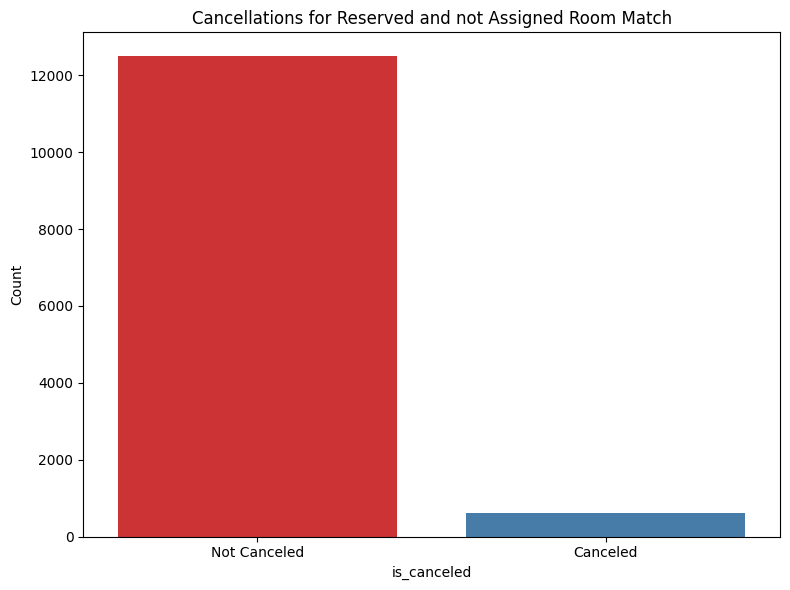

In [ ]:
#making a heat map on reserved room type vs assigned and cancellation rate
reserved_and_assigned = df[df['assigned_room_type'] == df['reserved_room_type']]
reserved_and_not_assigned=df[df['assigned_room_type'] != df['reserved_room_type']]

#plot between reserved_and_assigned and their cancelations

plt.figure(figsize=(8, 6))
sns.countplot(data=reserved_and_assigned, x='is_canceled', palette='Set1')
plt.title("Cancellations for Reserved and Assigned Room Match")
plt.xlabel("is_canceled")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Not Canceled", "Canceled"])
plt.tight_layout()
plt.show()

#plot between reserved_and_not_assigned and their cancelations

plt.figure(figsize=(8, 6))
sns.countplot(data=reserved_and_not_assigned, x='is_canceled', palette='Set1')
plt.title("Cancellations for Reserved and not Assigned Room Match")
plt.xlabel("is_canceled")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Not Canceled", "Canceled"])
plt.tight_layout()
plt.show()

In [ ]:
#well this is surprising the people who werent provided there requiured room didnt really cancel
print(reserved_and_not_assigned['is_canceled'].value_counts())
print(reserved_and_assigned['is_canceled'].value_counts())
#lets calculate some ratio
print("the reserved_and_not_assigned: ", 617/12492)
print("the reserved_and_assigned: ", 23404/50879)
#yea we can say there is something fishy here
#maybe the assigned room type was better then the booked one?


0    12492
1      617
Name: is_canceled, dtype: int64
0    50879
1    23404
Name: is_canceled, dtype: int64
the reserved_and_not_assigned:  0.04939161063080372
the reserved_and_assigned:  0.459993317478724


#EDA of numerical values

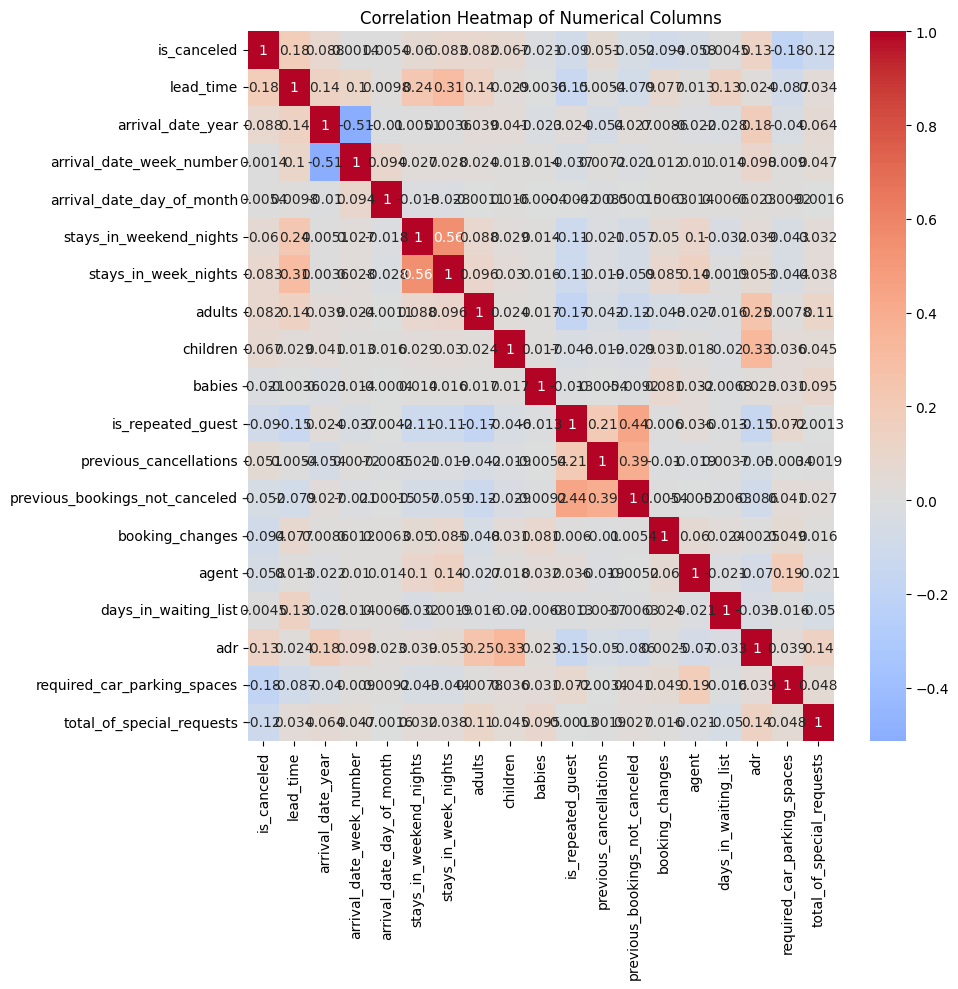

In [ ]:
numerical_cols = df.select_dtypes(include=['number'])  # Select numerical columns

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Columns")
plt.tight_layout()
plt.show()

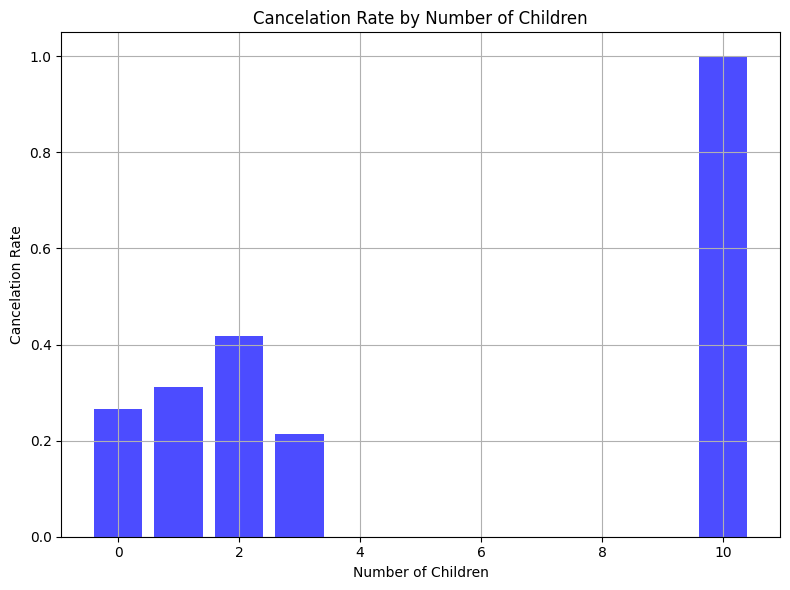

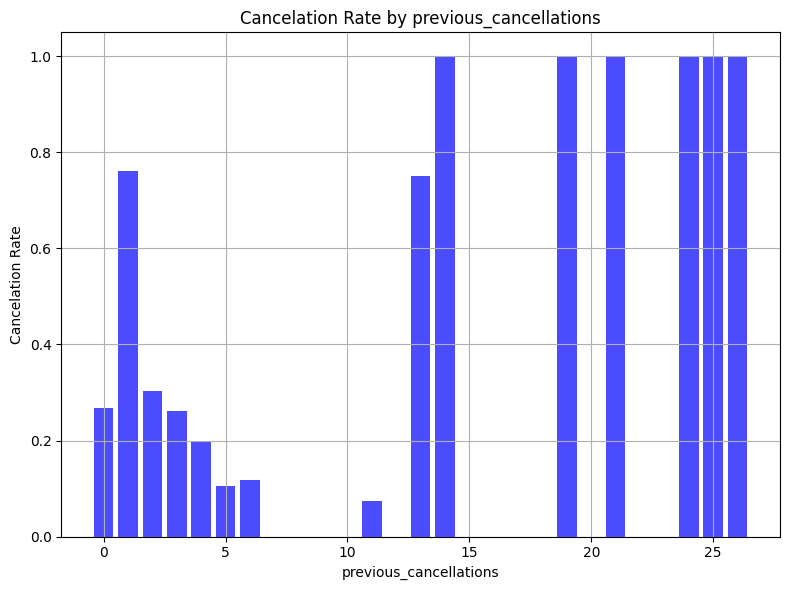

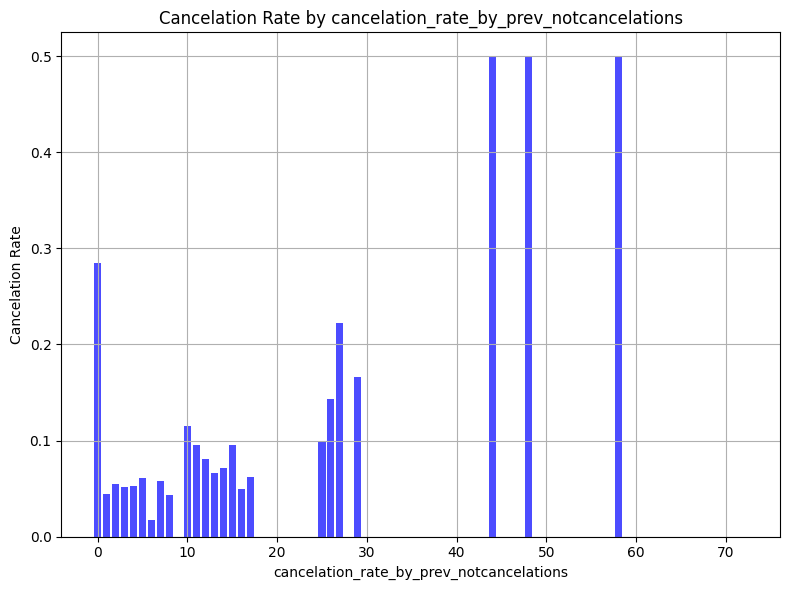

In [ ]:
#i want to specifically obsserve adr vs children in cancelation, prev cancelations, previous not canceled , repeated guest
#scatter plot for adr and children
cancelation_rate_by_children = df.groupby("children")["is_canceled"].mean()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.bar(cancelation_rate_by_children.index, cancelation_rate_by_children.values, color='blue', alpha=0.7)
plt.title("Cancelation Rate by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Cancelation Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

#tried many plots but no relation between adr adn cancelation rate  as such
#but there is a relation between number of childrem , adr and cancelation rate
cancelation_rate_by_prev_cancelations = df.groupby("previous_cancellations")["is_canceled"].mean()

plt.figure(figsize=(8, 6))
plt.bar(cancelation_rate_by_prev_cancelations.index, cancelation_rate_by_prev_cancelations.values, color='blue', alpha=0.7)
plt.title("Cancelation Rate by previous_cancellations")
plt.xlabel("previous_cancellations")
plt.ylabel("Cancelation Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

#there is a good relation ship with these columns

cancelation_rate_by_prev_notcancelations = df.groupby("previous_bookings_not_canceled")["is_canceled"].mean()

plt.figure(figsize=(8, 6))
plt.bar(cancelation_rate_by_prev_notcancelations.index, cancelation_rate_by_prev_notcancelations.values, color='blue', alpha=0.7)
plt.title("Cancelation Rate by cancelation_rate_by_prev_notcancelations")
plt.xlabel("cancelation_rate_by_prev_notcancelations")
plt.ylabel("Cancelation Rate")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
dummy=df[df['previous_bookings_not_canceled']>40]
dummy['is_canceled'].value_counts()
#so this is also  a good indicator of wether a booking will be canceled or not

0    32
1     3
Name: is_canceled, dtype: int64

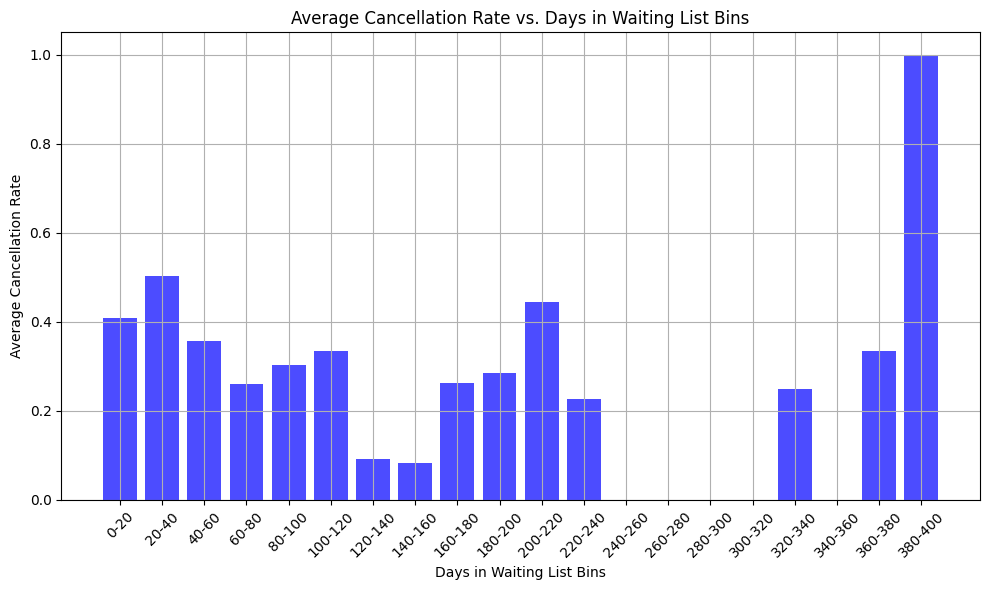

In [ ]:
#days in waiting list does guide the lead time lets see if there is a similar trend between lead time and cancellation and waiting time and cancelation

# Create bins
bins = list(range(0, 401, 20))  # Bins from 0 to 400 with gaps of 50

# Categorize the data into bins
df['days_bin'] = pd.cut(df['days_in_waiting_list'], bins=bins, labels=[f'{b}-{b+20}' for b in bins[:-1]])

# Calculate the average cancellation rate for each bin
cancelation_rate_by_bins = df.groupby('days_bin')['is_canceled'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(cancelation_rate_by_bins.index, cancelation_rate_by_bins.values, color='blue', alpha=0.7)
plt.xlabel('Days in Waiting List Bins')
plt.ylabel('Average Cancellation Rate')
plt.title('Average Cancellation Rate vs. Days in Waiting List Bins')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#almost like lead time so we can drop this off

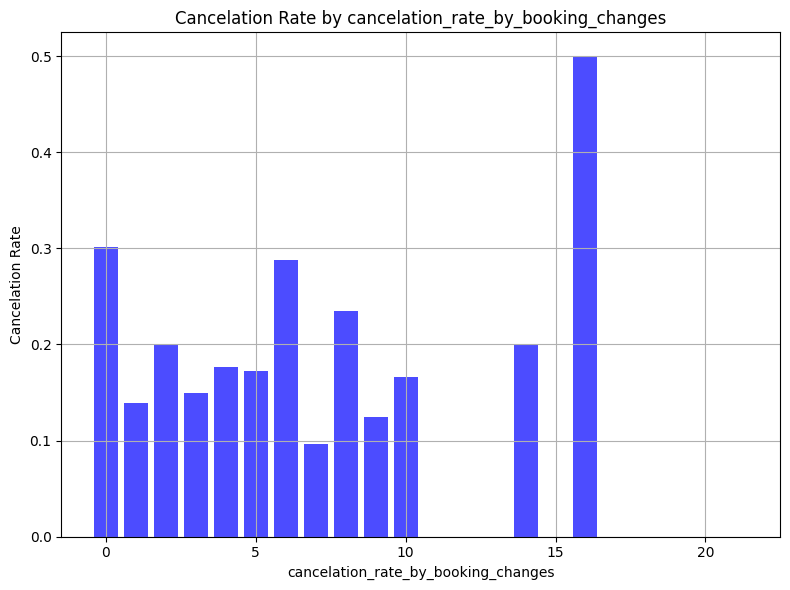

In [ ]:
#now lets see days in waiting list, booking changes
#booking changes and cancelation rate
cancelation_rate_by_booking_changes = df.groupby("booking_changes")["is_canceled"].mean()

plt.figure(figsize=(8, 6))
plt.bar(cancelation_rate_by_booking_changes.index, cancelation_rate_by_booking_changes.values, color='blue', alpha=0.7)
plt.title("Cancelation Rate by cancelation_rate_by_booking_changes")
plt.xlabel("cancelation_rate_by_booking_changes")
plt.ylabel("Cancelation Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#not too good relation
dummy=df[df['booking_changes']>10]
dummy['is_canceled'].value_counts()
#there is no linear relation between booking _changes might drop this column

0    22
1     2
Name: is_canceled, dtype: int64

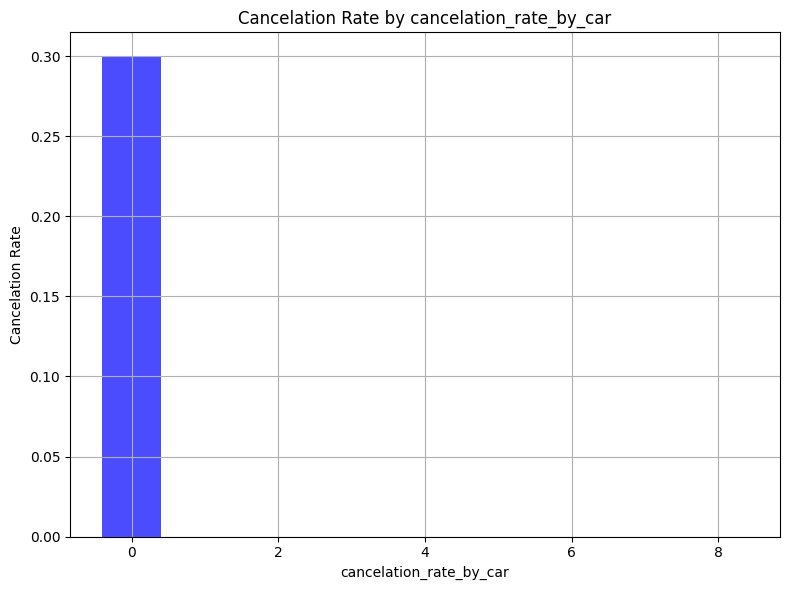

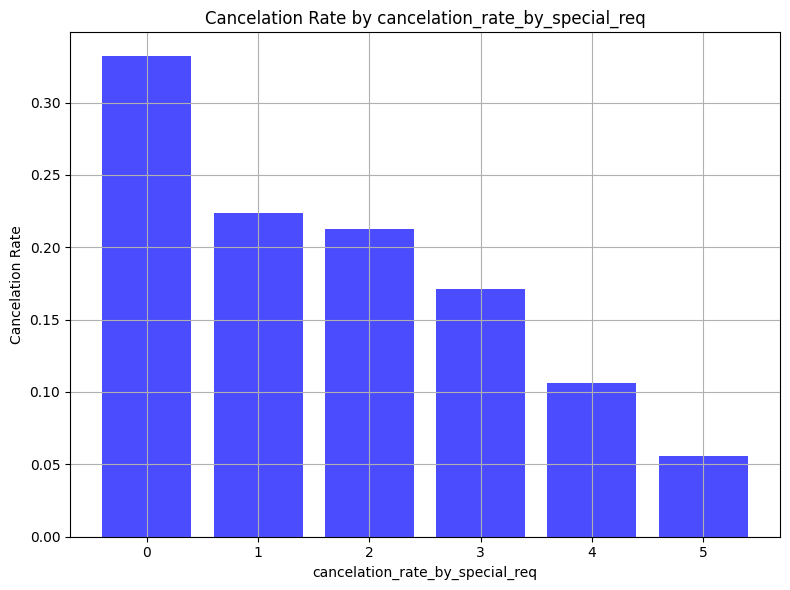

In [ ]:
#required car parking space and special reuests
cancelation_rate_by_car = df.groupby("required_car_parking_spaces")["is_canceled"].mean()

plt.figure(figsize=(8, 6))
plt.bar(cancelation_rate_by_car.index, cancelation_rate_by_car.values, color='blue', alpha=0.7)
plt.title("Cancelation Rate by cancelation_rate_by_car")
plt.xlabel("cancelation_rate_by_car")
plt.ylabel("Cancelation Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

cancelation_rate_by_special_req = df.groupby("total_of_special_requests")["is_canceled"].mean()

plt.figure(figsize=(8, 6))
plt.bar(cancelation_rate_by_special_req.index, cancelation_rate_by_special_req.values, color='blue', alpha=0.7)
plt.title("Cancelation Rate by cancelation_rate_by_special_req")
plt.xlabel("cancelation_rate_by_special_req")
plt.ylabel("Cancelation Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
dummy=df[df['required_car_parking_spaces']>0]
dummy['is_canceled'].value_counts()
#anyone with more than 0 parking space didnt canceled whaat?
#can we assume that if a person doesn't require parking space he could somewhat be caused to cance; due to unavailable transport?
#also there is an inverse type of relation with special requests as well
#we really need to do something about agent and country as well

0    7313
Name: is_canceled, dtype: int64

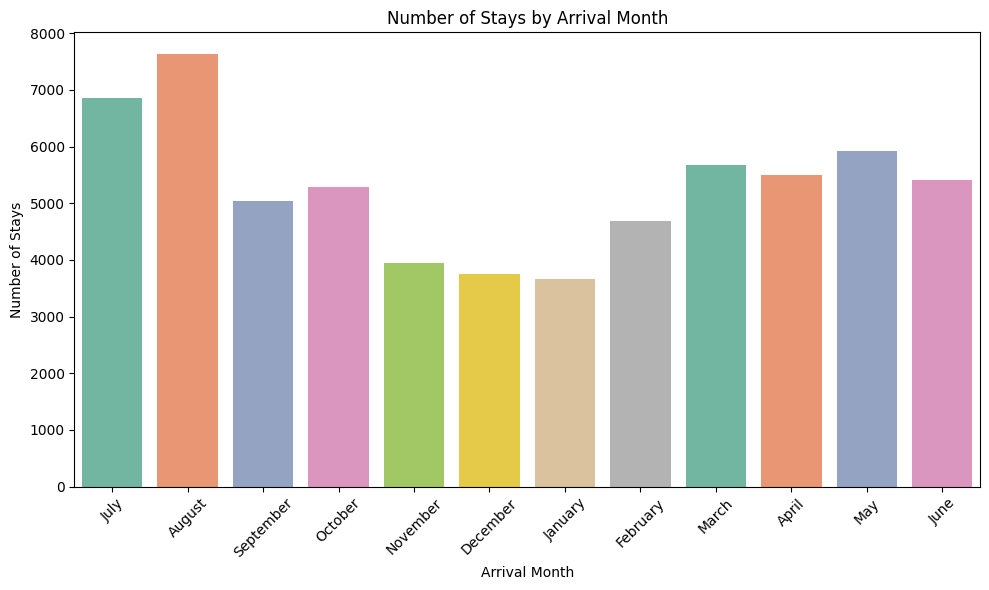

In [ ]:
#how many people come in months
stays_df = df[df["is_canceled"] == 0]

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=stays_df, x="arrival_date_month", palette="Set2")
plt.title("Number of Stays by Arrival Month")
plt.xlabel("Arrival Month")
plt.ylabel("Number of Stays")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

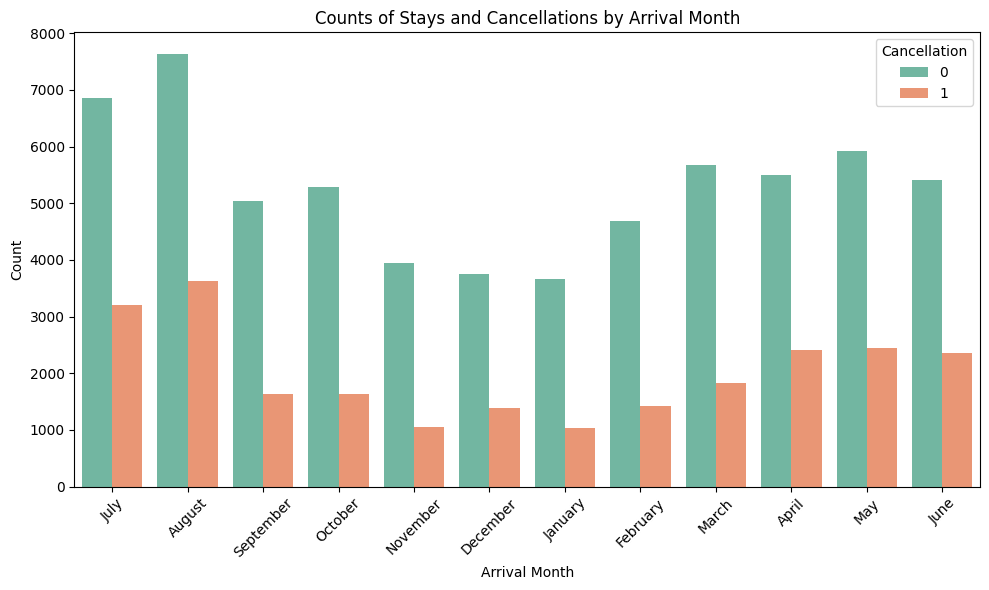

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="arrival_date_month", hue="is_canceled", palette="Set2")
plt.title("Counts of Stays and Cancellations by Arrival Month")
plt.xlabel("Arrival Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Cancellation")
plt.show()

#Dropping columns after EDA

In [ ]:
#country, hotel type specific month could be more related we wouldnt need to be more specific on year or dates
#thinking also in the context of prediction we will also not have the info of  assigned room types
cols_to_drop=['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'meal', 'is_repeated_guest','days_in_waiting_list','booking_changes','reservation_status_date','days_bin',
              'assigned_room_type']

df = df.drop(columns=cols_to_drop)

#Data Encoding

In [ ]:

# Initialize the OneHotEncoder
df = pd.get_dummies(df, columns=['hotel'])
df
df = pd.get_dummies(df, columns=['deposit_type'])
df

#encoding months to int 1 to 12
le = LabelEncoder()
df['arrival_date_month'] = le.fit_transform(df['arrival_date_month'])

df['customer_type'] = le.fit_transform(df['customer_type'])

df['market_segment'] = le.fit_transform(df['market_segment'])

df['reserved_room_type'] = le.fit_transform(df['reserved_room_type'])

df['distribution_channel'] = le.fit_transform(df['distribution_channel'])

df['country_encoded'] = le.fit_transform(df['country'])
df

,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,market_segment,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,hotel_City Hotel,hotel_Resort Hotel,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,country_encoded
0,0,342,5,0,0,2,0.0,0,PRT,3,...,2,0.00,0,0,0,1,1,0,0,135
1,0,737,5,0,0,2,0.0,0,PRT,3,...,2,0.00,0,0,0,1,1,0,0,135
2,0,7,5,0,1,1,0.0,0,GBR,3,...,2,75.00,0,0,0,1,1,0,0,59
3,0,13,5,0,1,1,0.0,0,GBR,2,...,2,75.00,0,0,0,1,1,0,0,59
4,0,14,5,0,2,2,0.0,0,GBR,6,...,2,98.00,0,1,0,1,1,0,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,1,2,5,2,0.0,0,BEL,5,...,2,96.14,0,0,1,0,1,0,0,15
119386,0,102,1,2,5,3,0.0,0,FRA,6,...,2,225.43,0,2,1,0,1,0,0,56
119387,0,34,1,2,5,2,0.0,0,DEU,6,...,2,157.71,0,4,1,0,1,0,0,43
119388,0,109,1,2,5,2,0.0,0,GBR,6,...,2,104.40,0,0,1,0,1,0,0,59


#Scaling and Normalization

In [ ]:

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns for normalization
columns_to_normalize = ['agent', 'lead_time', 'country_encoded']

# Perform Min-Max Scaling
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [ ]:
df=df.drop(columns='country')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87392 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87392 non-null  int64  
 1   lead_time                       87392 non-null  float64
 2   arrival_date_month              87392 non-null  int64  
 3   stays_in_weekend_nights         87392 non-null  int64  
 4   stays_in_week_nights            87392 non-null  int64  
 5   adults                          87392 non-null  int64  
 6   children                        87392 non-null  float64
 7   babies                          87392 non-null  int64  
 8   market_segment                  87392 non-null  int64  
 9   distribution_channel            87392 non-null  int64  
 10  previous_cancellations          87392 non-null  int64  
 11  previous_bookings_not_canceled  87392 non-null  int64  
 12  reserved_room_type             

#Model Training

Train Test Split

In [ ]:
X=df.drop('is_canceled', axis=1)
y=df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#linear classification

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on training features and transform testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the LogisticRegression model
model = LogisticRegression()

# Train the model on the scaled training data
model.fit(X_train, y_train)

# Predict on the scaled testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7635212449462202


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Random Forest

In [ ]:
X = df.drop("is_canceled", axis=1)
y = df["is_canceled"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8387207506150237


In [ ]:
X = df.drop("is_canceled", axis=1)
y = df["is_canceled"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier model with increased depth and more iterations
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.816637107386006


#SVC

In [ ]:
# # Split data into features (X) and target (y)
# X = df.drop("is_canceled", axis=1)
# y = df["is_canceled"]

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the SVC model
# model = SVC(random_state=42)

# # Train the model on the training data
# model.fit(X_train, y_train)

# # Predict on the testing data
# y_pred = model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)